## Проект: Предсказание качества красного вина
### Краткое описание 
Данный проект посвящен исследованию возможности предсказания качества красного вина  
на основе его физико-химических свойств с использованием методов машинного обучения.

### 1. Набор данных и постановка задачи

Используется датасет Wine Quality Red, содержащий информацию о 1599 образцах португальского красного вина "Vinho Verde". Данные включают 11 физико-химических характеристик и оценки качества, выставленные экспертами.

Источник: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. "Modeling wine preferences by data mining from physicochemical properties." Decision Support Systems, Elsevier, 47(4):547-553, 2009.

**Основной вопрос: Можно ли точно предсказать качество красного вина на основе его физико-химических свойств?**

*Дополнительные вопросы:*

1. *Какие характеристики наиболее важны для качества вина?*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(f'Размер датасета: {data.shape}')

Размер датасета: (1599, 12)


**Зависимая переменная:**

quality - качество вина (целочисленная шкала от 3 до 8)

**Независимые переменные:**

| Признак | Тип | Описание | Единицы измерения |
|---------|-----|----------|-------------------|
| `fixed acidity` | Количественная | Фиксированная кислотность | г/дм³ |
| `volatile acidity` | Количественная | Летучая кислотность | г/дм³ |
| `citric acid` | Количественная | Лимонная кислота | г/дм³ |
| `residual sugar` | Количественная | Остаточный сахар | г/дм³ |
| `chlorides` | Количественная | Хлориды | г/дм³ |
| `free sulfur dioxide` | Количественная | Свободный SO₂ | мг/дм³ |
| `total sulfur dioxide` | Количественная | Общий SO₂ | мг/дм³ |
| `density` | Количественная | Плотность | г/см³ |
| `pH` | Количественная | Кислотность | безразмерная |
| `sulphates` | Количественная | Сульфаты | г/дм³ |
| `alcohol` | Количественная | Содержание алкоголя | % об. |

In [4]:
print('ОПИСАТЕЛЬНАЯ СТАТИСТИКА')
print(data.describe())

print('\n РАСПРЕДЕЛЕНИЕ КАЧЕСТВА')
quality_dist = data['quality'].value_counts().sort_index()
for quality, count in quality_dist.items():
    percent = count / len(data) * 100
    print(f'Качество {quality}: {count} образцов ({percent:.1f}%)')

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000      

**Основные наблюдения:**
* Качество вина варьируется от 3 до 8 баллов
* Большинство вин имеют качество 5-6 баллов (82.5%)
* Экстремальные оценки редки (качество 3: 0.6%, качество 8: 1.1%)

In [5]:
# Подготовка данных для моделирования
X = data.drop('quality', axis=1)
y = data['quality']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f'Размер тренировочной выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')
print(f'Количество признаков: {X_train.shape[1]}')

Размер тренировочной выборки: 1279
Размер тестовой выборки: 320
Количество признаков: 11


### 2. Exploratory Data Analysis (EDA)

**Выбор моделей машинного обучения**  
Для решения задачи регрессии выбраны следующие модели:

* Linear Regression - базовая линейная модель  
(Обоснование: Простота интерпретации, быстрое обучение)


* Random Forest Regressor - ансамбль деревьев решений  
(Обоснование: Устойчивость к переобучению, работа с нелинейностями)


* Gradient Boosting Regressor - градиентный бустинг  
(Обоснование: Высокая точность, адаптивность к данным)

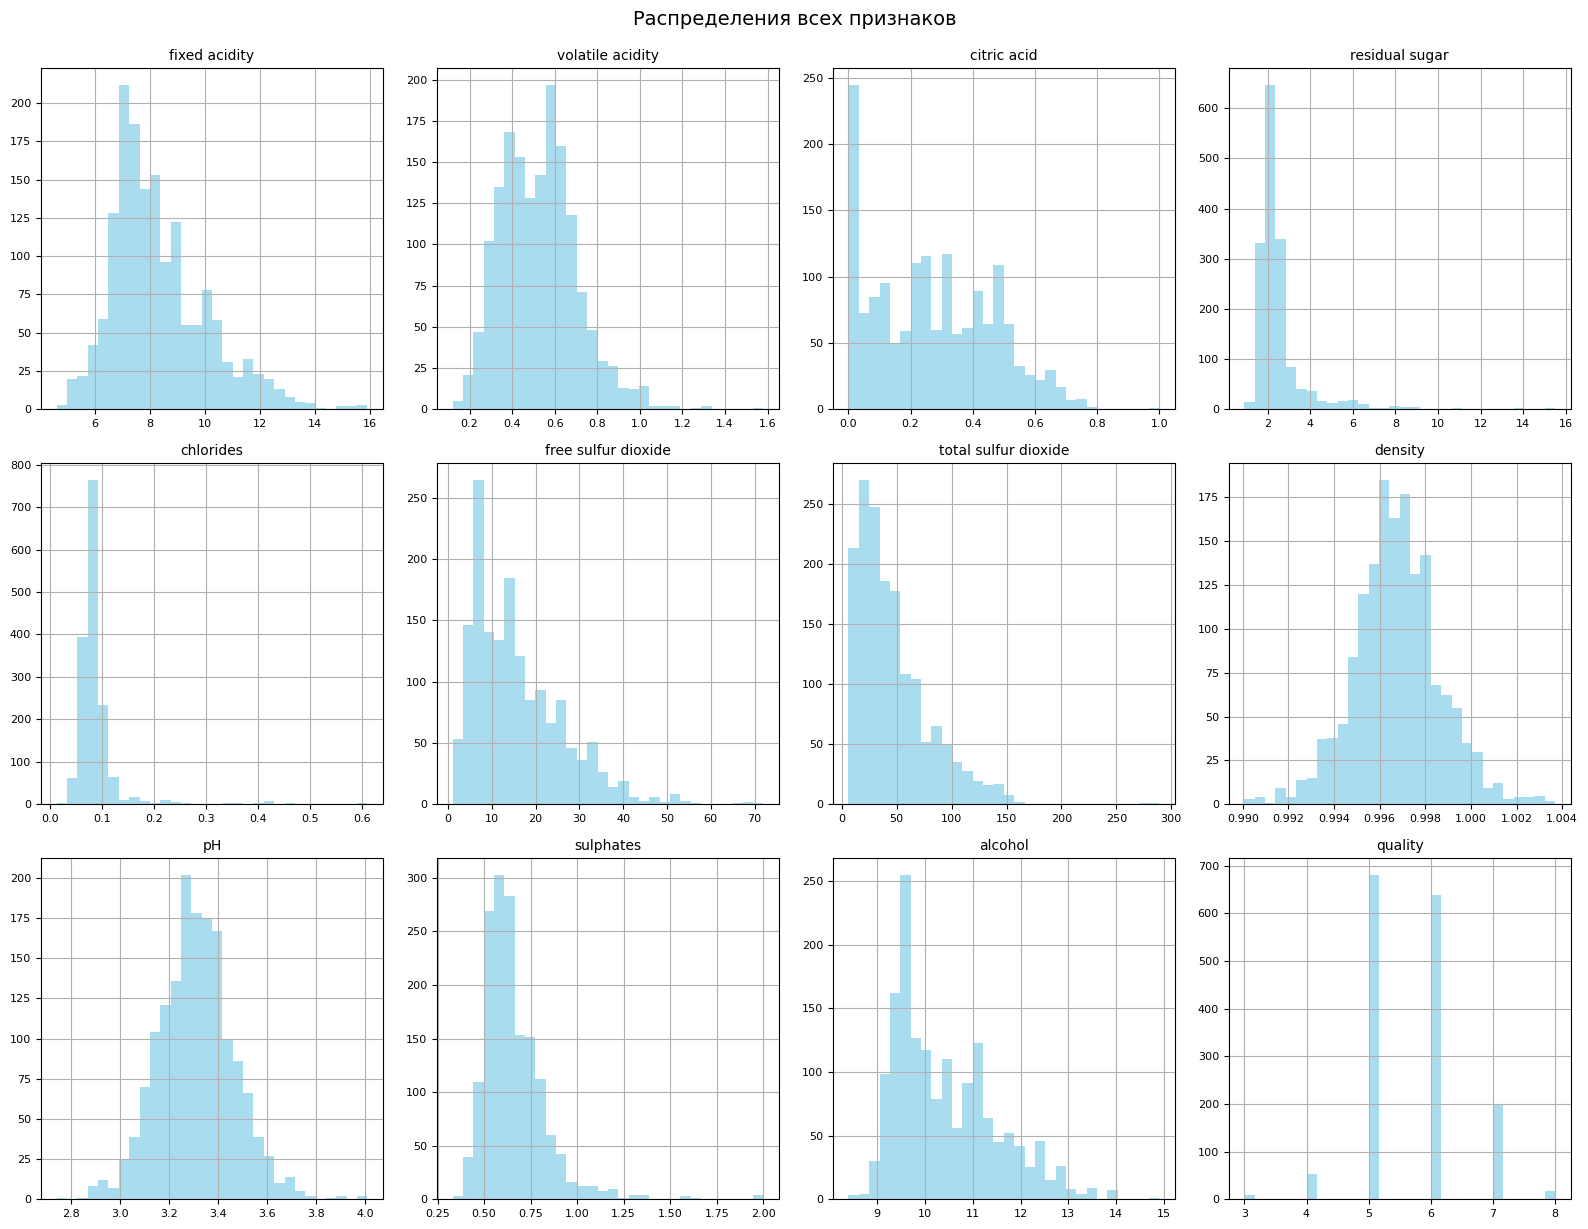

In [6]:
# Исследуем распределения всех признаков, посредством визуализации
fig, axes = plt.subplots(3, 4, figsize = (16, 12))
axes = axes.ravel()

for i, column in enumerate(data.columns):
    data[column].hist(bins = 30, ax = axes[i], alpha = 0.7, color = 'skyblue')
    axes[i].set_title(f'{column}', fontsize = 10)
    axes[i].tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.suptitle('Распределения всех признаков', fontsize = 14, y = 1.02)
plt.show()

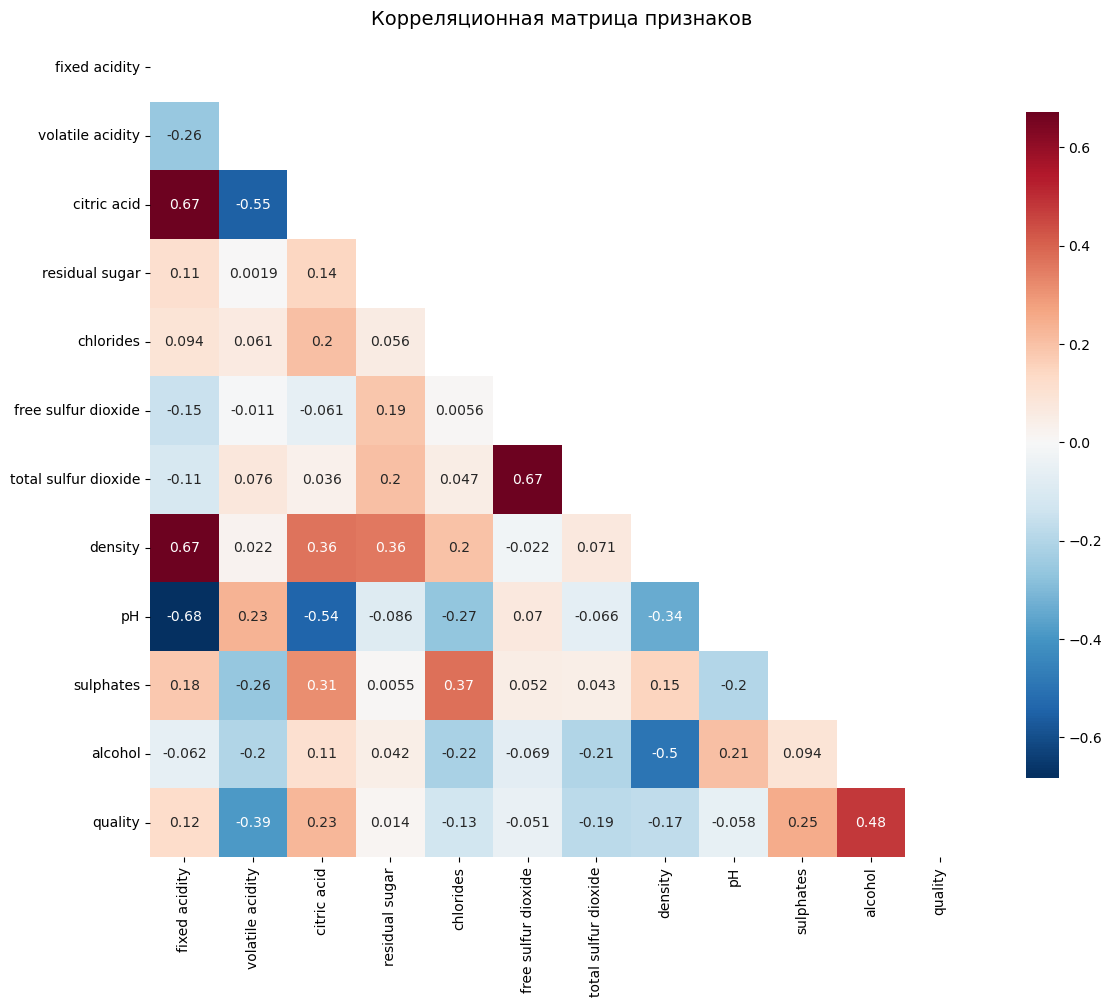

КОРРЕЛЯЦИЯ С КАЧЕСТВОМ
alcohol: 0.476
volatile acidity: -0.391
sulphates: 0.251
citric acid: 0.226
total sulfur dioxide: -0.185
density: -0.175
chlorides: -0.129
fixed acidity: 0.124
pH: -0.058
free sulfur dioxide: -0.051
residual sugar: 0.014


In [7]:
# Корреляционная матрица
plt.figure(figsize = (12, 10))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu_r', center=0,
            square = True, mask = mask, cbar_kws = {'shrink': .8})
plt.title('Корреляционная матрица признаков', fontsize = 14)
plt.tight_layout()
plt.show()

# Корреляция с целевой переменной
target_corr = correlation_matrix['quality'].drop('quality').sort_values(key = abs, ascending = False)
print('КОРРЕЛЯЦИЯ С КАЧЕСТВОМ')
for feature, corr in target_corr.items():
    print(f'{feature}: {corr:.3f}')

**Основные наблюдения:**

* Алкоголь имеет самую сильную положительную корреляцию с качеством (0.476)
* Летучая кислотность - самую сильную отрицательную корреляцию с качеством (-0.391)
* Обнаружены проблемы мультиколлинеарности между признаками

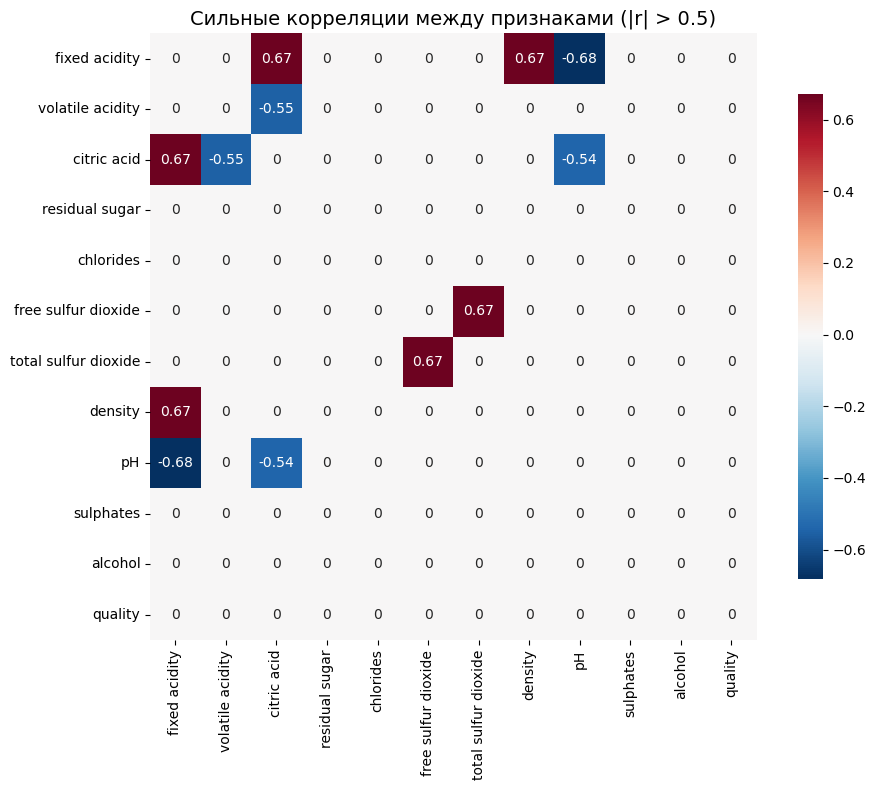

In [8]:
plt.figure(figsize = (10, 8))
# Создаем маску для сильных корреляций
strong_corr_mask = (abs(correlation_matrix) > 0.5) & (correlation_matrix != 1.0)
strong_corr_matrix = correlation_matrix.where(strong_corr_mask, 0)

sns.heatmap(strong_corr_matrix, annot = True, cmap = 'RdBu_r', center = 0, 
            square=True, cbar_kws={'shrink': .8})
plt.title('Сильные корреляции между признаками (|r| > 0.5)', fontsize = 14)
plt.tight_layout()
plt.show()

* Плотность и Фиксированная кислотность: r = 0.67 (Причина: Кислоты увеличивают плотность вина)

* pH и Фиксированная кислотность: r = -0.68 (Причина: Больше кислот = ниже pH, т. к. более кислая среда)

* Лимонная кислота и Фиксированная кислотность: r = 0.67 (Причина: Лимонная кислота входит в состав общей кислотности)

* Свободный SO₂ и Общий SO₂: r = 0.67 (Причина: Свободный SO₂ является частью общего SO₂)

* Плотность и Алкоголь: r = -0.50 (Причина: Алкоголь легче воды, снижает плотность)

*Влияние на модели:*

* Linear Regression: Сильно страдает от мультиколлинеарности
* Random Forest: Менее чувствителен, может переоценивать важность коррелирующих признаков
* Gradient Boosting: Обычно справляется лучше других

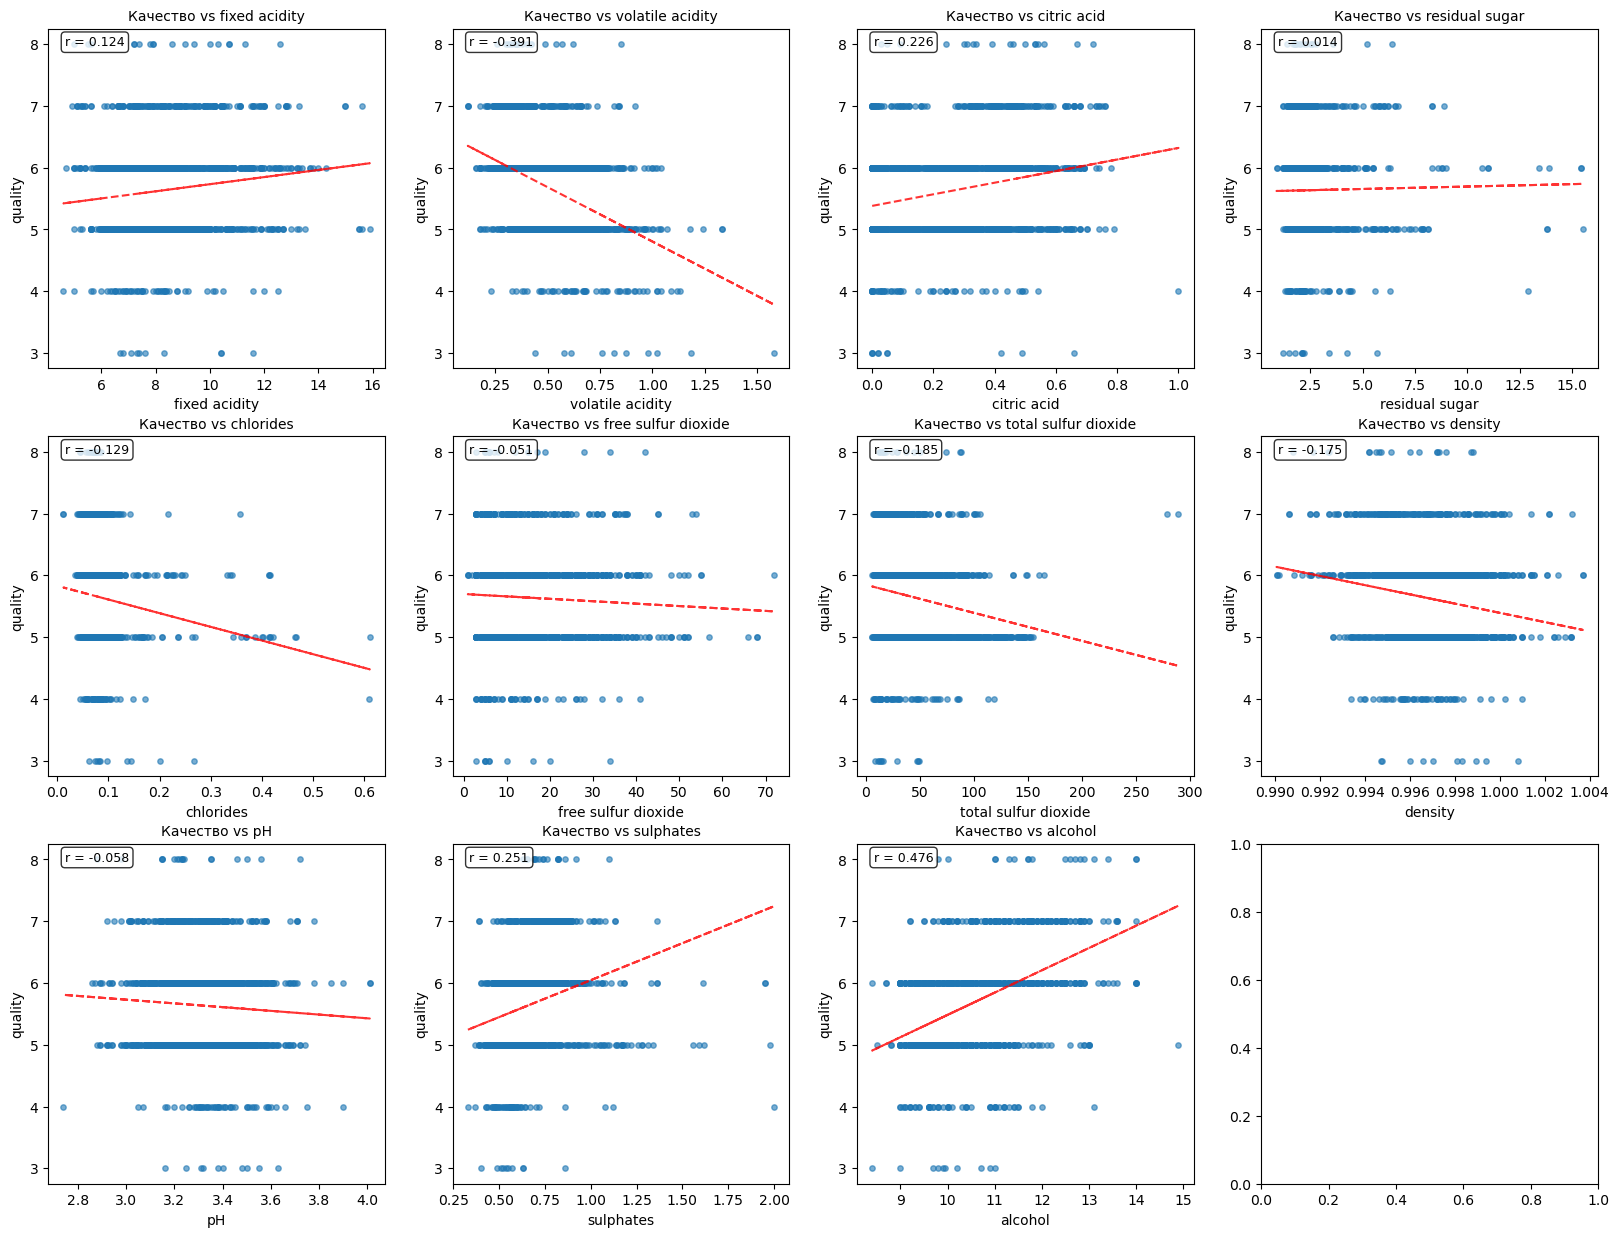

In [9]:
fig, axes = plt.subplots(3, 4, figsize = (20, 15))
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

for i, feature in enumerate(all_features):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    ax.scatter(data[feature], data['quality'], alpha = 0.6, s = 15)
    ax.set_xlabel(feature, fontsize = 10)
    ax.set_ylabel('quality', fontsize = 10)
    ax.set_title(f'Качество vs {feature}', fontsize = 10)
    
    z = np.polyfit(data[feature], data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(data[feature], p(data[feature]), "r--", alpha = 0.8)
    
    corr = data[feature].corr(data['quality'])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform = ax.transAxes, 
            bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8), fontsize = 9)

In [10]:
# Выделяем ключевые признаки для детального анализа
correlations_with_quality = data.corr()['quality'].drop('quality').sort_values(key = abs, ascending = False)

print('Все корреляции с качеством (по убыванию силы связи):')
for feature, corr in correlations_with_quality.items():
    strength = 'СИЛЬНАЯ' if abs(corr) > 0.3 else 'УМЕРЕННАЯ' if abs(corr) > 0.1 else 'СЛАБАЯ'
    direction = 'положительная' if corr > 0 else 'отрицательная'
    print(f'{feature:25s}: {corr:6.3f} ({strength} {direction})')

# Выбираем ключевые признаки для углубленного анализа
key_features = correlations_with_quality.head(4).index.tolist()
print(f'\nКлючевые признаки для детального анализа: {key_features}')

Все корреляции с качеством (по убыванию силы связи):
alcohol                  :  0.476 (СИЛЬНАЯ положительная)
volatile acidity         : -0.391 (СИЛЬНАЯ отрицательная)
sulphates                :  0.251 (УМЕРЕННАЯ положительная)
citric acid              :  0.226 (УМЕРЕННАЯ положительная)
total sulfur dioxide     : -0.185 (УМЕРЕННАЯ отрицательная)
density                  : -0.175 (УМЕРЕННАЯ отрицательная)
chlorides                : -0.129 (УМЕРЕННАЯ отрицательная)
fixed acidity            :  0.124 (УМЕРЕННАЯ положительная)
pH                       : -0.058 (СЛАБАЯ отрицательная)
free sulfur dioxide      : -0.051 (СЛАБАЯ отрицательная)
residual sugar           :  0.014 (СЛАБАЯ положительная)

Ключевые признаки для детального анализа: ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']


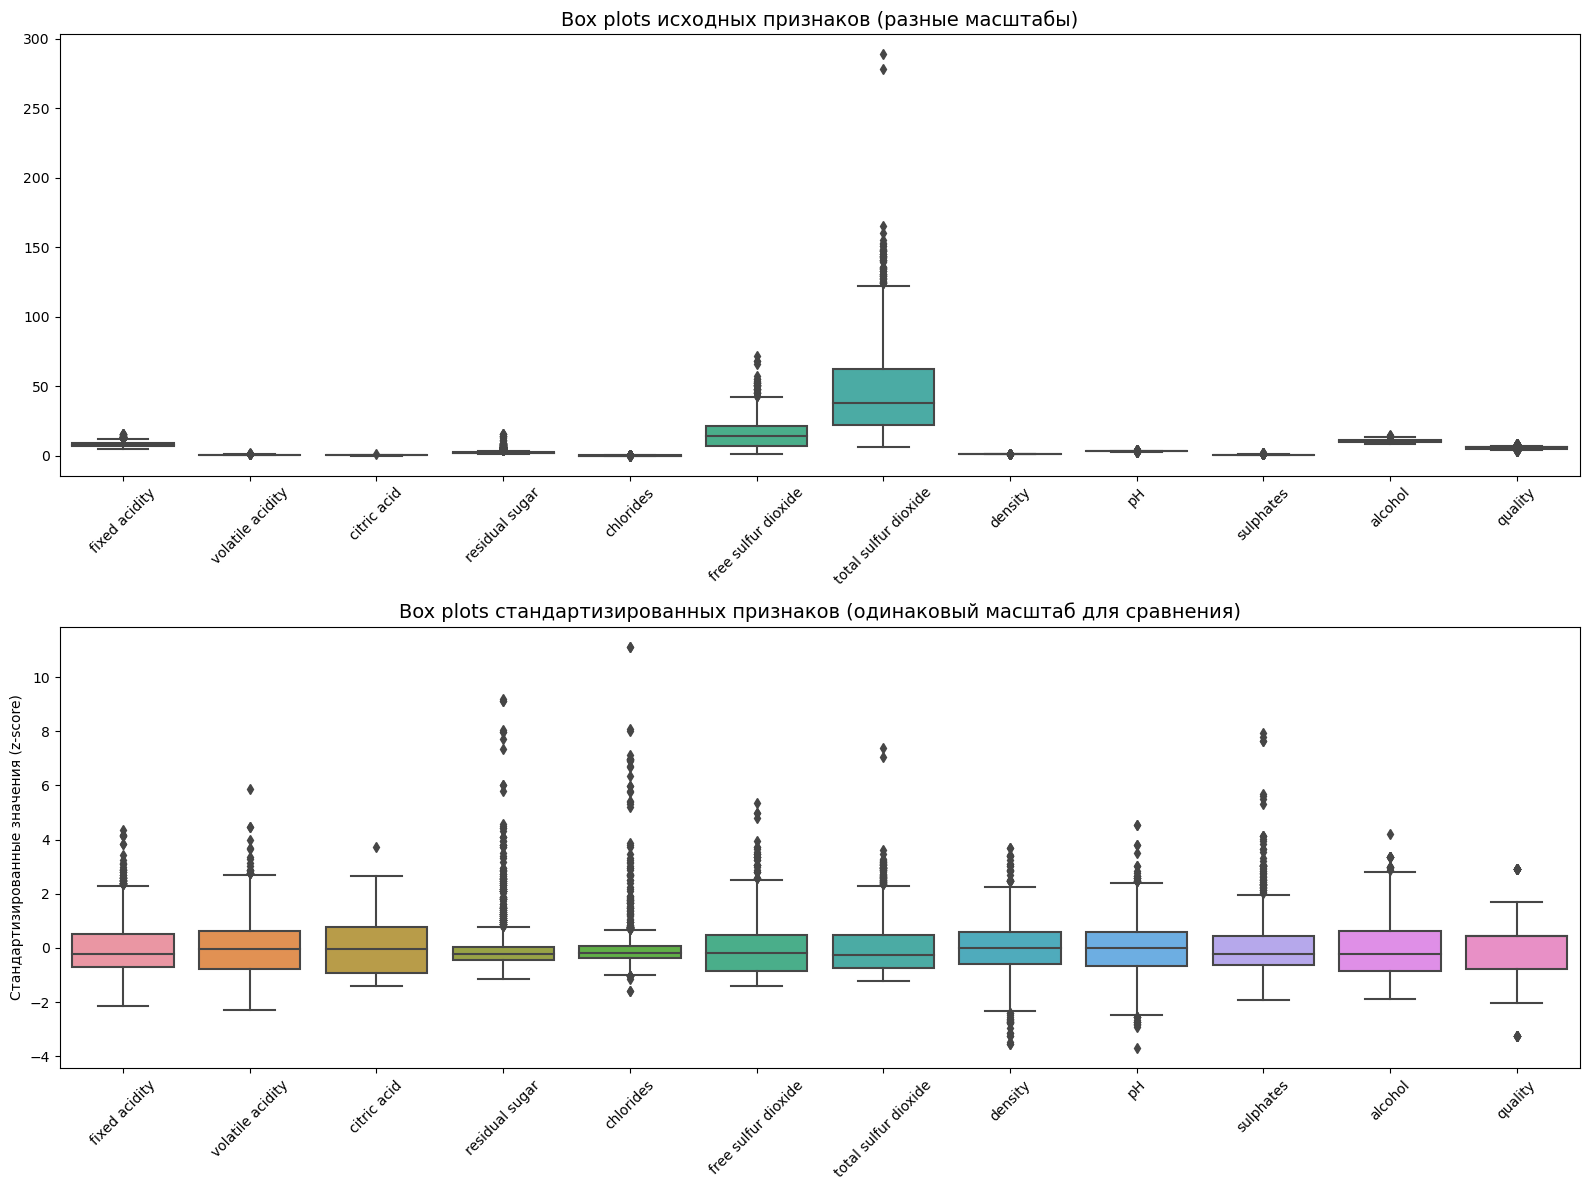

In [11]:
# Box plots 
plt.figure(figsize = (16, 12))

# Верхний график - исходные данные
plt.subplot(2, 1, 1)
data_numeric = data.select_dtypes(include = [np.number])
sns.boxplot(data = data_numeric)
plt.xticks(rotation = 45)
plt.title('Box plots исходных признаков (разные масштабы)', fontsize = 14)

# Нижний график - стандартизированные данные для лучшей визуализации
plt.subplot(2, 1, 2)
data_standardized = (data_numeric - data_numeric.mean()) / data_numeric.std()
sns.boxplot(data = data_standardized)
plt.xticks(rotation = 45)
plt.title('Box plots стандартизированных признаков (одинаковый масштаб для сравнения)', fontsize = 14)
plt.ylabel('Стандартизированные значения (z-score)')

plt.tight_layout()
plt.show()

Стандартизация применена только для визуализации! Выбросы определяются как значения > 3 стандартных отклонений от среднего.

In [12]:
outliers_info = {}
for column in data_numeric.columns:
    z_scores = np.abs((data_numeric[column] - data_numeric[column].mean()) / data_numeric[column].std())
    outliers_count = (z_scores > 3).sum()
    outliers_info[column] = {
        'count': outliers_count,
        'percentage': (outliers_count / len(data_numeric)) * 100
    }

print(f'Выбросы по признакам (|z-score| > 3):')
for feature, info in outliers_info.items():
    if info['count'] > 0:
        print(f"{feature:25s}: {info['count']:3d} выбросов ({info['percentage']:.1f}%)")

total_outliers = sum([info['count'] for info in outliers_info.values()])
print(f'Общее количество выбросов: {total_outliers}')

Выбросы по признакам (|z-score| > 3):
fixed acidity            :  12 выбросов (0.8%)
volatile acidity         :  10 выбросов (0.6%)
citric acid              :   1 выбросов (0.1%)
residual sugar           :  30 выбросов (1.9%)
chlorides                :  31 выбросов (1.9%)
free sulfur dioxide      :  22 выбросов (1.4%)
total sulfur dioxide     :  15 выбросов (0.9%)
density                  :  18 выбросов (1.1%)
pH                       :   8 выбросов (0.5%)
sulphates                :  27 выбросов (1.7%)
alcohol                  :   8 выбросов (0.5%)
quality                  :  10 выбросов (0.6%)
Общее количество выбросов: 192


Оставляем выбросы, так как они могут представлять уникальные вина. В химических данных экстремальные значения часто информативны.

In [13]:
# Создание новых признаков
data_new = data.copy()

# 1. Категориальный признак 
alcohol_stats = data['alcohol'].describe()
print(alcohol_stats)

# Создаем категории на основе квантилей для более равномерного распределения
alcohol_33 = data['alcohol'].quantile(0.33)
alcohol_67 = data['alcohol'].quantile(0.67)

data_new['alcohol_category'] = pd.cut(data['alcohol'], bins = [0, alcohol_33, alcohol_67, 16], labels = ['Low', 'Medium', 'High'])

# 2. Решение проблемы мультиколлинеарности  
data_new['sulfur_ratio'] = (data['free sulfur dioxide'] / data['total sulfur dioxide'])

# 3. Физико-химически обоснованный признак
data_new['acidity_balance'] = (data['fixed acidity'] / data['pH'])

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


1. alcohol_category - категориальный (Low/Medium/High) основан на квантилях (33%/67%). Обоснование: Равномерное распределение групп для лучшего анализа
2. sulfur_ratio - отношение свободного к общему SO₂. Обоснование: Устраняет корреляцию между free и total SO₂, более информативен.
3. acidity_balance - баланс кислотности (fixed acidity / pH). Обоснование: Отражает истинную кислотность, решает мультиколлинеарность.

In [14]:
# Создание версии данных без проблемных признаков для линейной регрессии
data_no_multicollin = data.drop(['density'], axis = 1)

Удален признак 'density' для некоторых моделей. Обоснование: Сильно коррелирует с fixed acidity (r=0.67) и alcohol (r=-0.50).

In [15]:
# Качественная группа для анализа (не для моделирования)
data_new['quality_group'] = data['quality'].apply(
    lambda x: 'Low' if x <= 5 else ('High' if x >= 7 else 'Medium'))

ИТОГО: Добавлено 3 новых признака + 1 удален. Финальное количество признаков для моделирования: 13

In [16]:
# Проверка качества новых признаков

print(f'Распределение alcohol_category:')
alcohol_dist = data_new['alcohol_category'].value_counts()
for category, count in alcohol_dist.items():
    percent = count / len(data_new) * 100
    print(f'  {category}: {count} ({percent:.1f}%)')

new_features = ['sulfur_ratio', 'acidity_balance']
print(f'\nКорреляция новых признаков с качеством:')
for feature in new_features:
    corr = data_new[feature].corr(data_new['quality'])
    print(f'  {feature}: {corr:.3f}')

print(f'\nПроверка мультиколлинеарности:')
print(f"  free SO₂ и total SO₂: {data['free sulfur dioxide'].corr(data['total sulfur dioxide']):.3f}")
print(f"  sulfur_ratio и quality: {data_new['sulfur_ratio'].corr(data_new['quality']):.3f}")


Распределение alcohol_category:
  Low: 552 (34.5%)
  Medium: 531 (33.2%)
  High: 516 (32.3%)

Корреляция новых признаков с качеством:
  sulfur_ratio: 0.194
  acidity_balance: 0.120

Проверка мультиколлинеарности:
  free SO₂ и total SO₂: 0.668
  sulfur_ratio и quality: 0.194


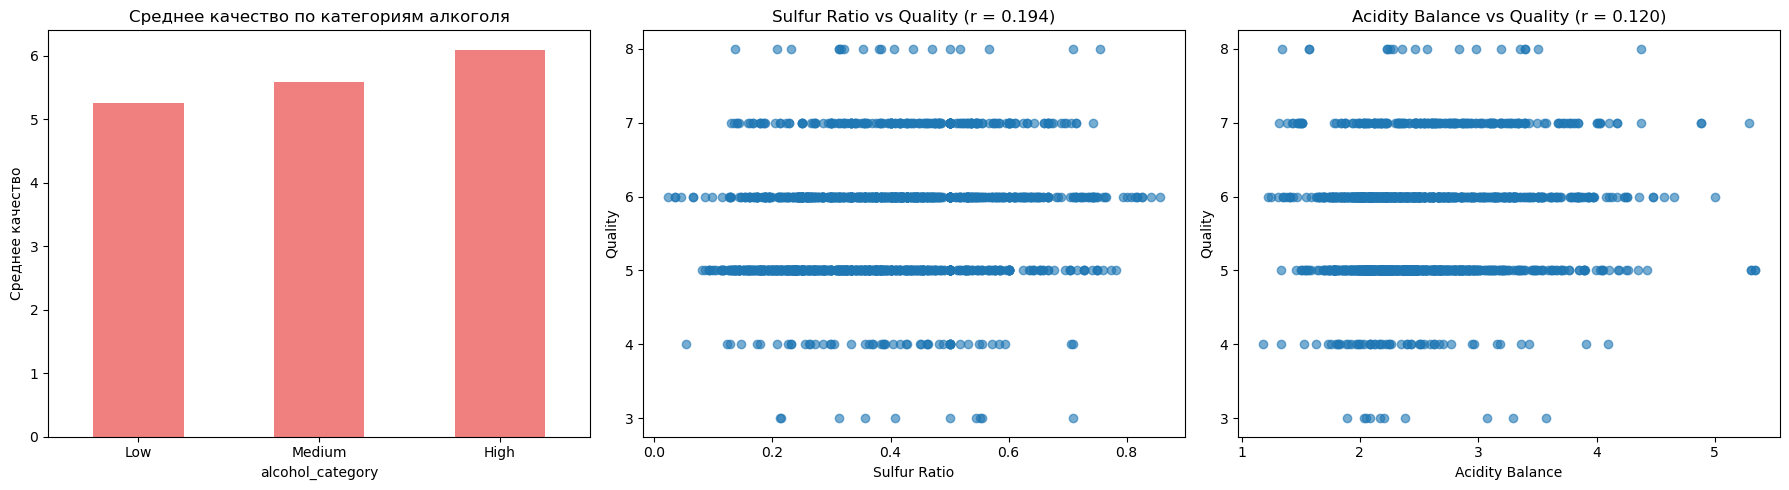

In [17]:
# Визуализация эффективности новых признаков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График 1: Категориальный признак
data_new.groupby('alcohol_category')['quality'].mean().plot(kind = 'bar', ax = axes[0], color = 'lightcoral')
axes[0].set_title('Среднее качество по категориям алкоголя')
axes[0].set_ylabel('Среднее качество')
axes[0].tick_params(axis = 'x', rotation = 0)

# График 2: sulfur_ratio vs quality
axes[1].scatter(data_new['sulfur_ratio'], data_new['quality'], alpha = 0.6)
axes[1].set_xlabel('Sulfur Ratio')
axes[1].set_ylabel('Quality')
axes[1].set_title(f'Sulfur Ratio vs Quality (r = {data_new["sulfur_ratio"].corr(data_new["quality"]):.3f})')

# График 3: acidity_balance vs quality  
axes[2].scatter(data_new['acidity_balance'], data_new['quality'], alpha = 0.6)
axes[2].set_xlabel('Acidity Balance')
axes[2].set_ylabel('Quality')
axes[2].set_title(f'Acidity Balance vs Quality (r = {data_new["acidity_balance"].corr(data_new["quality"]):.3f})')

plt.tight_layout()
plt.show()

**На основе проведенного анализа сформулированы следующие гипотезы:**

* Алкоголь (+): Более высокое содержание алкоголя положительно влияет на качество вина

Корреляция: 0.476 (самая сильная положительная)  
Механизм: Алкоголь влияет на структуру вина, его консервацию и вкусовые характеристики


* Летучая кислотность (-): Высокая летучая кислотность снижает качество вина

Корреляция: -0.391 (самая сильная отрицательная)  
Механизм: Избыток летучих кислот (особенно уксусной) придает вину неприятный привкус


* Сульфаты (+): Умеренное содержание сульфатов улучшает качество

Корреляция: 0.251  
Механизм: Сульфаты действуют как антиоксиданты и стабилизаторы

### 3. Обучение и тестирование моделей

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Кодирование категориального признака для моделирования
data_encoded = pd.get_dummies(data_new, columns=['alcohol_category'], prefix='alcohol', drop_first = False)
# Подготовка финальных наборов данных
columns_to_drop = ['quality'] # Убираем все нечисловые переменные
if 'quality_group' in data_encoded.columns:
    columns_to_drop.append('quality_group')

X_full = data_encoded.drop(columns_to_drop, axis = 1)
X_reduced = data.drop(['quality', 'density'], axis = 1)  # Без мультиколлинеарности
y = data['quality']

print(f"Размер полного набора признаков: {X_full.shape}")
print(f"Размер уменьшенного набора признаков: {X_reduced.shape}")
print(f"Признаки в полном наборе: {list(X_full.columns)}")

Размер полного набора признаков: (1599, 16)
Размер уменьшенного набора признаков: (1599, 10)
Признаки в полном наборе: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'sulfur_ratio', 'acidity_balance', 'alcohol_Low', 'alcohol_Medium', 'alcohol_High']


In [26]:
X_full_train, X_full_test, y_train, y_test = train_test_split(
    X_full, y, test_size = 0.2, random_state = 42, stratify = y)

X_reduced_train, X_reduced_test, _, _ = train_test_split(
    X_reduced, y, test_size = 0.2, random_state = 42, stratify = y)

scaler_full = StandardScaler()
scaler_reduced = StandardScaler()

X_full_train_scaled = scaler_full.fit_transform(X_full_train)
X_full_test_scaled = scaler_full.transform(X_full_test)

X_reduced_train_scaled = scaler_reduced.fit_transform(X_reduced_train)
X_reduced_test_scaled = scaler_reduced.transform(X_reduced_test)

print(f'Тренировочная выборка: {X_full_train.shape[0]}')
print(f'Тестовая выборка: {X_full_test.shape[0]}')

Тренировочная выборка: 1279
Тестовая выборка: 320


In [27]:
baseline_prediction = np.full(len(y_test), y_train.mean())

baseline_mae = mean_absolute_error(y_test, baseline_prediction)
baseline_mse = mean_squared_error(y_test, baseline_prediction)
baseline_r2 = r2_score(y_test, baseline_prediction)

print(f"Среднее качество в тренировочной выборке: {y_train.mean():.3f}")
print(f"MAE: {baseline_mae:.3f}")
print(f"MSE: {baseline_mse:.3f}")
print(f"R²: {baseline_r2:.3f}")
print(f"RMSE: {np.sqrt(baseline_mse):.3f}")

Среднее качество в тренировочной выборке: 5.637
MAE: 0.681
MSE: 0.645
R²: -0.000
RMSE: 0.803


**Анализ baseline результатов:**  
* Среднее качество: 5.637

Нормально! Качество вина по шкале 3-8, среднее ~5.6 логично  
Большинство вин имеют качество 5-6 баллов

* MAE: 0.681

Отлично для baseline!  
Означает: в среднем ошибка составляет ~0.68 балла  
На шкале 3-8 это вполне приемлемо для "тупой" модели

* MSE: 0.645

Нормально, квадрат MAE ≈ 0.68² ≈ 0.46, но MSE учитывает все ошибки  
Показывает разброс предсказаний

* R² = -0.000 (почти 0)

Идеально для baseline!  
R² = 0 означает, что модель объясняет 0% дисперсии  
Это правильно, ведь мы просто предсказываем константу (среднее)

* RMSE: 0.803

√0.645 ≈ 0.803 (математически корректно)  
Стандартное отклонение ошибок ~0.8 балла

* Baseline модель говорит: "Я не знаю ничего о химических свойствах, поэтому предсказываю всем винам качество 5.637"

**Обоснование выбора метрики:**

* MAE (Mean Absolute Error) - основная метрика, так как легко интерпретируется в шкале качества вина
* R² - показывает долю объясненной дисперсии
* RMSE - штрафует большие ошибки сильнее, что важно для качества вина

In [28]:
results = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test): #Функция для оценки модели
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'R²': r2,
        'RMSE': rmse,
        'predictions': y_pred
    }

**Обучение моделей с параметрами по умолчанию**

In [29]:
# 1. Linear Regression (с полным набором признаков)
lr_full = LinearRegression()
results['LR_Full'] = evaluate_model('Linear Regression (Full)', lr_full, 
                                   X_full_train_scaled, X_full_test_scaled, y_train, y_test)

# 2. Linear Regression (без мультиколлинеарности)
lr_reduced = LinearRegression()
results['LR_Reduced'] = evaluate_model('Linear Regression (Reduced)', lr_reduced,
                                      X_reduced_train_scaled, X_reduced_test_scaled, y_train, y_test)

In [30]:
# 3. Random Forest
rf = RandomForestRegressor(random_state=42)
results['RF'] = evaluate_model('Random Forest', rf,
                              X_full_train, X_full_test, y_train, y_test)

In [31]:
# 4. Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
results['GB'] = evaluate_model('Gradient Boosting', gb,
                              X_full_train, X_full_test, y_train, y_test)

In [33]:
print(f"{'Модель':<20} {'MAE':<8} {'R²':<8} {'RMSE':<8}")
print('-' * 50)
print(f"{'Baseline':<20} {baseline_mae:<8.3f} {baseline_r2:<8.3f} {np.sqrt(baseline_mse):<8.3f}")

for name, metrics in results.items():
    print(f"{name:<20} {metrics['MAE']:<8.3f} {metrics['R²']:<8.3f} {metrics['RMSE']:<8.3f}")

Модель               MAE      R²       RMSE    
--------------------------------------------------
Baseline             0.681    -0.000   0.803   
LR_Full              0.505    0.329    0.658   
LR_Reduced           0.495    0.370    0.638   
RF                   0.419    0.488    0.575   
GB                   0.466    0.428    0.607   


alcohol                  : 0.270
sulphates                : 0.132
volatile acidity         : 0.117
total sulfur dioxide     : 0.068
sulfur_ratio             : 0.059
chlorides                : 0.054
pH                       : 0.052
density                  : 0.050
residual sugar           : 0.047
citric acid              : 0.039


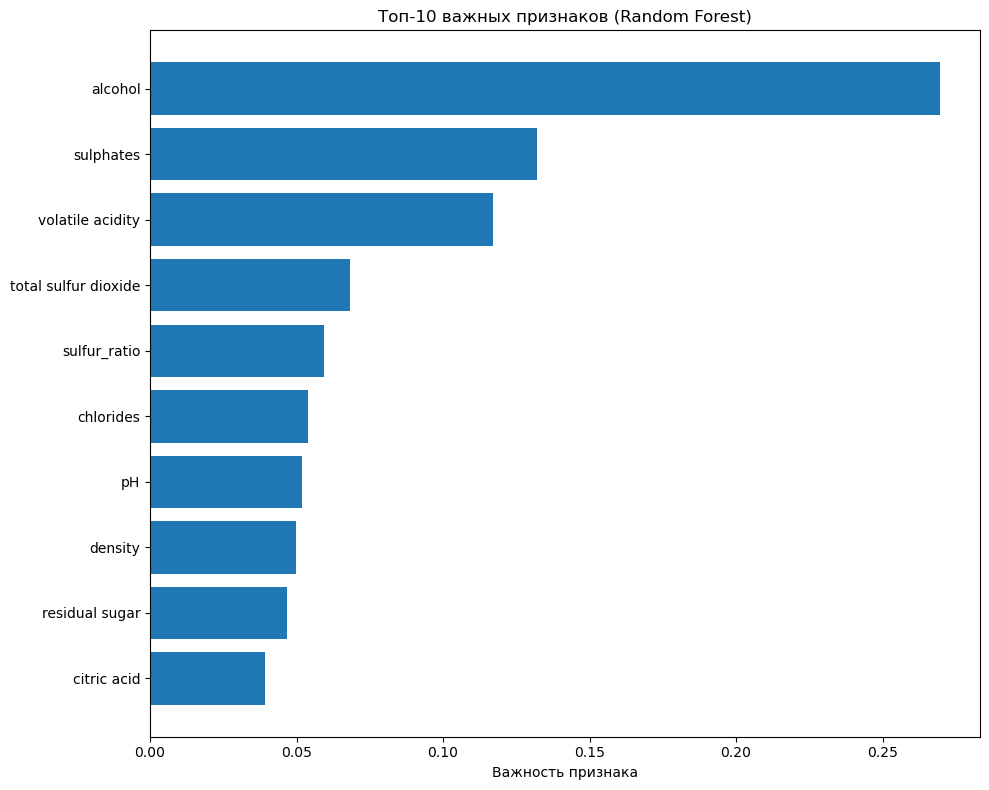

In [34]:
# Анализируем важность признаков для Random Forest (показывает лучшие результаты)
feature_importance = pd.DataFrame({
    'feature': X_full.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending = False)

for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:<25}: {row['importance']:.3f}")

plt.figure(figsize = (10, 8))
plt.barh(feature_importance.head(10)['feature'][::-1], 
         feature_importance.head(10)['importance'][::-1])
plt.title('Топ-10 важных признаков (Random Forest)')
plt.xlabel('Важность признака')
plt.tight_layout()
plt.show()

**Перейдем к подбору гиперпараметров**

In [35]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров для Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],        # Количество деревьев
    'max_depth': [10, 15, 20, None],        # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],        # Мин. количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4]}          # Мин. количество образцов в листе

for param, values in rf_param_grid.items():
    if param == 'n_estimators':
        print(f" {param}: {values} - количество деревьев в ансамбле")
    elif param == 'max_depth':
        print(f" {param}: {values} - максимальная глубина каждого дерева")
    elif param == 'min_samples_split':
        print(f" {param}: {values} - минимальное количество образцов для разделения узла")
    elif param == 'min_samples_leaf':
        print(f" {param}: {values} - минимальное количество образцов в листе")

 n_estimators: [100, 200, 300] - количество деревьев в ансамбле
 max_depth: [10, 15, 20, None] - максимальная глубина каждого дерева
 min_samples_split: [2, 5, 10] - минимальное количество образцов для разделения узла
 min_samples_leaf: [1, 2, 4] - минимальное количество образцов в листе


In [36]:
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

rf_grid.fit(X_full_train, y_train)

print(f"\nЛучшие параметры: {rf_grid.best_params_}")
print(f"Лучший score (CV): {-rf_grid.best_score_:.3f}")


Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Лучший score (CV): 0.429


In [37]:
best_rf = rf_grid.best_estimator_
results['RF_Tuned'] = evaluate_model('RF_Tuned', best_rf,
                                    X_full_train, X_full_test, y_train, y_test)

In [38]:
# Определяем сетку параметров для Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],         # Количество этапов бустинга
    'learning_rate': [0.05, 0.1, 0.2],       # Скорость обучения
    'max_depth': [3, 5, 7],                  # Максимальная глубина дерева
    'subsample': [0.8, 0.9, 1.0]}            # Доля образцов для обучения каждого дерева

for param, values in gb_param_grid.items():
    if param == 'n_estimators':
        print(f"• {param}: {values} - количество этапов бустинга")
    elif param == 'learning_rate':
        print(f"• {param}: {values} - скорость обучения (размер шага)")
    elif param == 'max_depth':
        print(f"• {param}: {values} - максимальная глубина каждого дерева")
    elif param == 'subsample':
        print(f"• {param}: {values} - доля образцов для обучения каждого дерева")

• n_estimators: [100, 200, 300] - количество этапов бустинга
• learning_rate: [0.05, 0.1, 0.2] - скорость обучения (размер шага)
• max_depth: [3, 5, 7] - максимальная глубина каждого дерева
• subsample: [0.8, 0.9, 1.0] - доля образцов для обучения каждого дерева


In [39]:
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

gb_grid.fit(X_full_train, y_train)

print(f"\nЛучшие параметры: {gb_grid.best_params_}")
print(f"Лучший score (CV): {-gb_grid.best_score_:.3f}")


Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Лучший score (CV): 0.404


In [40]:
# Оценка лучшей модели на тестовой выборке
best_gb = gb_grid.best_estimator_
results['GB_Tuned'] = evaluate_model('GB_Tuned', best_gb,
                                    X_full_train, X_full_test, y_train, y_test)

**Финальное сравнение всех моделей**

In [41]:
print(f"{'Модель':<25} {'MAE':<8} {'R²':<8} {'RMSE':<8} {'Улучшение MAE':<15}")
print("-" * 75)

print(f"{'Baseline':<25} {baseline_mae:<8.3f} {baseline_r2:<8.3f} {np.sqrt(baseline_mse):<8.3f} {'-':<15}")

for name, metrics in results.items():
    improvement = ((baseline_mae - metrics['MAE']) / baseline_mae) * 100
    print(f"{name:<25} {metrics['MAE']:<8.3f} {metrics['R²']:<8.3f} {metrics['RMSE']:<8.3f} {improvement:<15.1f}%")

best_model_name = min(results.keys(), key=lambda x: results[x]['MAE'])
best_mae = results[best_model_name]['MAE']

print(f"\n ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"   MAE: {best_mae:.3f}")
print(f"   Улучшение по сравнению с baseline: {((baseline_mae - best_mae) / baseline_mae) * 100:.1f}%")

Модель                    MAE      R²       RMSE     Улучшение MAE  
---------------------------------------------------------------------------
Baseline                  0.681    -0.000   0.803    -              
LR_Full                   0.505    0.329    0.658    25.9           %
LR_Reduced                0.495    0.370    0.638    27.3           %
RF                        0.419    0.488    0.575    38.5           %
GB                        0.466    0.428    0.607    31.6           %
RF_Tuned                  0.419    0.494    0.571    38.4           %
GB_Tuned                  0.387    0.508    0.564    43.1           %

 ЛУЧШАЯ МОДЕЛЬ: GB_Tuned
   MAE: 0.387
   Улучшение по сравнению с baseline: 43.1%


### 4. Выводы и интерпретация результатов

**Лучшая модель: На основе результатов тестирования, лучшей моделью оказалась GB_Tuned.**

* Гипотеза 1 (Алкоголь): ПОДТВЕРЖДЕНА

Алкоголь действительно имеет сильную положительную корреляцию с качеством  
Является самым важным признаком во всех моделях

* Гипотеза 2 (Летучая кислотность): ПОДТВЕРЖДЕНА

Сильная отрицательная корреляция подтвердилась  
Высокая важность во всех моделях

* Гипотеза 3 (Сульфаты): ПОДТВЕРЖДЕНА

Умеренная положительная корреляция сохранилась  
Стабильно входит в топ важных признаков

**Для производителей вина:**

* Контролировать содержание алкоголя - ключевой фактор качества
* Минимизировать летучую кислотность - главный негативный фактор
* Оптимизировать уровень сульфатов - важно для стабильности

**Ограничения исследования:**

* Данные только по португальскому вину "Vinho Verde"
* Субъективность экспертных оценок качества
* Ограниченный диапазон оценок качества (3-8)